In [3]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [4]:
path = "../data/Resultados_plebiscito_nacional_2020/Resultados-Plebiscito-Constitucion-Politica-2020.xlsx"


df = pd.read_excel(path)
    

In [5]:
df

,Nro. Región,Región,Provincia,Circ.Senatorial,Distrito,Comuna,Circ.Electoral,Local,Mesa,Tipo mesa,Mesas Fusionadas,Electores,Nro.voto,Opción Constitución Política,Votos TRICEL
0,1.0,DE TARAPACA,IQUIQUE,Circ. Senatorial 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,18.0,M,18M,344.0,1.0,APRUEBO,139.0
1,1.0,DE TARAPACA,IQUIQUE,Circ. Senatorial 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,18.0,M,18M,344.0,2.0,RECHAZO,34.0
2,1.0,DE TARAPACA,IQUIQUE,Circ. Senatorial 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,18.0,M,18M,344.0,900.0,VOTOS NULOS,1.0
3,1.0,DE TARAPACA,IQUIQUE,Circ. Senatorial 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,18.0,M,18M,344.0,901.0,VOTOS EN BLANCO,0.0
4,1.0,DE TARAPACA,IQUIQUE,Circ. Senatorial 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,19.0,M,19M,343.0,1.0,APRUEBO,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178785,16.0,DE ÑUBLE,DIGUILLIN,Circ. Senatorial 16,DISTRITO 19,YUNGAY,YUNGAY,LICEO DE YUNGAY,9.0,M,9M,333.0,2.0,RECHAZO,39.0
178786,16.0,DE ÑUBLE,DIGUILLIN,Circ. Senatorial 16,DISTRITO 19,YUNGAY,YUNGAY,LICEO DE YUNGAY,9.0,M,9M,333.0,900.0,VOTOS NULOS,2.0
178787,16.0,DE ÑUBLE,DIGUILLIN,Circ. Senatorial 16,DISTRITO 19,YUNGAY,YUNGAY,LICEO DE YUNGAY,9.0,M,9M,333.0,901.0,VOTOS EN BLANCO,0.0
178788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


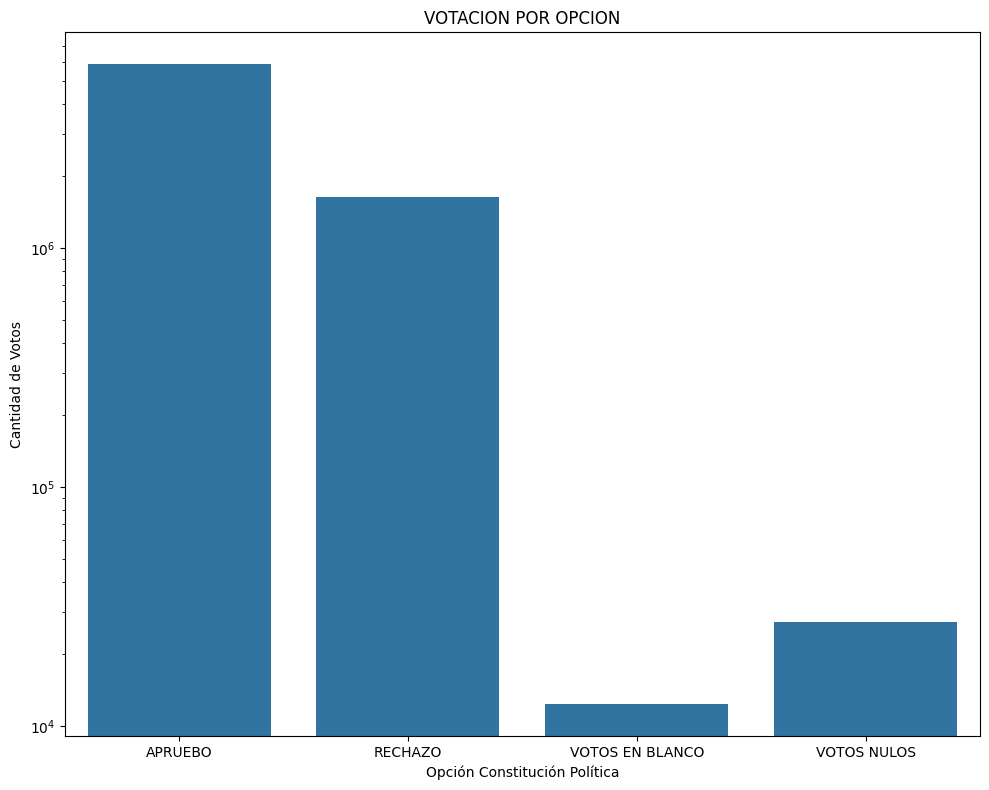

In [24]:

categorias = ["APRUEBO", "RECHAZO", "VOTOS EN BLANCO", "VOTOS NULOS"]
resumen = df.groupby("Opción Constitución Política")["Votos TRICEL"].sum().reset_index()
resultados_filtrados = resumen[resumen["Opción Constitución Política"].isin(categorias)]
#Grafico de los votos 
plt.figure(figsize=(10, 8))
sns.barplot(x="Opción Constitución Política", y= "Votos TRICEL", data= resultados_filtrados)
plt.yscale("log")
plt.title("VOTACION POR OPCION")
plt.ylabel("Cantidad de Votos")
plt.tight_layout()
plt.savefig("votacion_por_opcion")
plt.show()


In [13]:
#TABLA CON LOS RESULTADOS DE LAS VOTACIONES     
resultados_filtrados["Votos TRICEL"] = resultados_filtrados["Votos TRICEL"].astype(int)
resultados_filtrados

C:\Users\nicom\AppData\Local\Temp\ipykernel_6152\1770931072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados_filtrados["Votos TRICEL"] = resultados_filtrados["Votos TRICEL"].astype(int)


,Opción Constitución Política,Votos TRICEL
0,APRUEBO,5874352
1,RECHAZO,1628958
3,VOTOS EN BLANCO,12313
4,VOTOS NULOS,27329


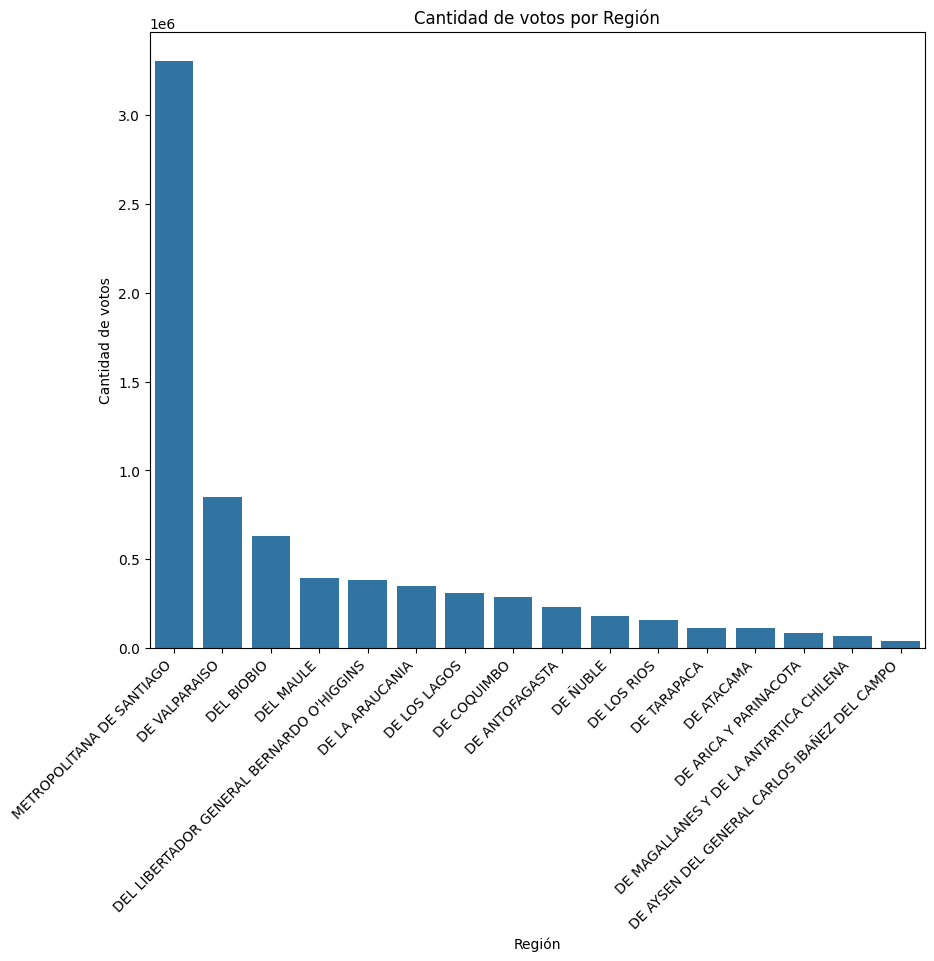

In [20]:
apruebo_rechazo = df[df["Opción Constitución Política"].isin(["APRUEBO", "RECHAZO"])]
df_region = apruebo_rechazo.groupby("Región")["Votos TRICEL"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x = df_region.index, y=df_region.values)
plt.title("Cantidad de votos por Región")
plt.xlabel("Región")
plt.ylabel("Cantidad de votos")
plt.xticks(rotation = 45, ha = "right")
plt.savefig("grafico_votos_por_region.png")

